In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from processing import biosppy_processing, nk_processing, processing_aggregate
from time_domain import time
from frequency_domain import frequency
from nonlinear import nonlinear
import numpy as np
import scipy
from tqdm.notebook import tqdm

pd.set_option('display.float_format', lambda x: f'{x:.2f}') 

## 0. Read Data

In [2]:
sampling_rate = 2000
raw = pd.read_csv('./data/ecg_70.txt', sep = ' ').T
raw

,1,2,3,4,5,6,7,8,9,10,...,239991,239992,239993,239994,239995,239996,239997,239998,239999,240000
id1,0.79,0.79,0.79,0.78,0.78,0.77,0.77,0.76,0.76,0.75,...,1.75,1.69,1.62,1.56,1.49,1.43,1.36,1.30,1.23,1.16
id2,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,...,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02
id3,0.04,0.04,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,...,0.13,0.13,0.13,0.13,0.13,0.13,0.13,0.13,0.13,0.13
id4,-0.36,-0.36,-0.35,-0.34,-0.34,-0.33,-0.33,-0.32,-0.32,-0.31,...,-0.20,-0.19,-0.19,-0.19,-0.19,-0.19,-0.19,-0.19,-0.19,-0.19
id5,-0.02,-0.02,-0.02,-0.02,-0.02,-0.01,-0.01,-0.01,-0.01,-0.01,...,0.10,0.08,0.06,0.03,0.01,-0.01,-0.03,-0.05,-0.07,-0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
id69,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.09,0.09,0.10,...,0.08,0.08,0.08,0.08,0.08,0.08,0.08,0.08,0.08,0.08
id70,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.01,0.01,0.01,...,-0.07,-0.09,-0.10,-0.12,-0.13,-0.14,-0.15,-0.16,-0.16,-0.17
id71,-0.55,-0.55,-0.55,-0.55,-0.55,-0.55,-0.55,-0.56,-0.56,-0.56,...,0.08,0.08,0.08,0.08,0.08,0.08,0.08,0.08,0.08,0.08
id72,-0.00,-0.00,-0.00,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.02,...,-0.07,-0.07,-0.07,-0.07,-0.07,-0.07,-0.07,-0.07,-0.08,-0.08


## 1. Time Domain

In [3]:
end_list = range(10*2000, 120*2000 + 1, 5*2000)
sampling_rate = 2000
result_dict = dict()
for row in tqdm(raw.iterrows(), total = 70):
    id = row[0]
    result_dict[id] = dict()
    for end in end_list:
        signal = row[1].tolist()[:end]
        pro = nk_processing(signal, sampling_rate)
        result = time(pro['rpeaks'], sampling_rate)
        result_dict[id][f'~{end//2000} sec'] = result
        
        


  0%|          | 0/70 [00:00<?, ?it/s]

In [4]:
pd.DataFrame(result_dict).T

def get_parameters(row, name = 'pyhrv hr'):
    cols = [f'~{i} sec' for i in range(10, 121, 5)]
    temp = dict()
    for col in cols:
        temp[col] = row[col][name]
    return pd.Series(temp)
sdnn_result = pd.DataFrame(result_dict).T.apply(get_parameters, args = ('pyhrv sdnn',), axis = 1)
rmssd_result = pd.DataFrame(result_dict).T.apply(get_parameters, args = ('pyhrv rmssd',), axis = 1)


In [11]:
sdnn_result

,~10 sec,~15 sec,~20 sec,~25 sec,~30 sec,~35 sec,~40 sec,~45 sec,~50 sec,~55 sec,...,~75 sec,~80 sec,~85 sec,~90 sec,~95 sec,~100 sec,~105 sec,~110 sec,~115 sec,~120 sec
id1,9.14,37.24,33.13,29.98,27.44,25.54,23.98,22.63,21.70,21.07,...,23.64,23.38,22.87,22.56,22.14,22.02,21.64,21.65,21.33,21.01
id2,13.08,14.12,13.50,26.41,13.10,12.75,12.44,12.70,12.11,11.88,...,11.74,12.58,13.05,15.44,15.73,15.87,16.03,16.63,18.58,19.26
id3,10.97,16.70,19.64,23.08,27.43,33.91,38.88,38.04,36.50,35.44,...,58.39,58.12,57.33,55.72,54.49,53.86,52.76,51.78,51.73,52.35
id4,99.97,145.20,131.48,127.33,123.35,128.63,127.76,124.69,124.29,122.51,...,138.58,140.56,141.58,140.17,139.89,137.99,135.57,135.31,133.79,137.08
id5,29.27,27.61,28.91,30.25,31.90,39.07,34.15,35.21,40.49,34.12,...,33.44,32.70,32.34,32.89,33.15,38.74,34.84,34.85,35.37,35.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
id69,180.12,150.59,136.15,120.16,109.91,105.83,101.03,96.57,94.04,92.86,...,85.92,83.44,84.20,81.85,81.53,80.00,79.57,78.15,76.83,76.64
id70,95.05,71.22,56.27,54.26,83.04,86.53,83.30,82.76,79.55,75.78,...,68.69,66.67,65.65,64.01,66.60,66.46,65.62,66.96,66.00,66.72
id71,36.80,32.14,41.46,42.23,45.28,45.03,44.05,45.40,46.52,47.01,...,58.78,60.62,59.44,62.23,63.87,66.21,71.74,70.72,70.09,69.18
id72,39.89,88.11,92.67,86.16,79.38,73.87,74.30,79.05,85.61,84.70,...,82.59,81.80,82.56,80.97,79.68,78.25,76.81,76.02,75.75,74.32


In [22]:
def get_diff(row):
    diff = row[:-1] - row[-1]
    return pd.Series(diff)
sdnn_diff = sdnn_result.apply(get_diff, axis = 1)
sdnn_diff

,~10 sec,~15 sec,~20 sec,~25 sec,~30 sec,~35 sec,~40 sec,~45 sec,~50 sec,~55 sec,...,~70 sec,~75 sec,~80 sec,~85 sec,~90 sec,~95 sec,~100 sec,~105 sec,~110 sec,~115 sec
id1,-11.88,16.22,12.12,8.97,6.42,4.53,2.97,1.61,0.68,0.06,...,2.24,2.62,2.37,1.86,1.55,1.13,1.01,0.62,0.63,0.31
id2,-6.18,-5.14,-5.76,7.15,-6.16,-6.51,-6.82,-6.56,-7.15,-7.38,...,-7.60,-7.52,-6.68,-6.21,-3.82,-3.53,-3.39,-3.23,-2.63,-0.68
id3,-41.39,-35.65,-32.72,-29.27,-24.92,-18.45,-13.47,-14.31,-15.85,-16.92,...,6.05,6.04,5.77,4.98,3.37,2.14,1.50,0.41,-0.57,-0.62
id4,-37.11,8.12,-5.60,-9.75,-13.73,-8.44,-9.32,-12.39,-12.78,-14.57,...,-4.68,1.50,3.48,4.50,3.09,2.81,0.92,-1.51,-1.76,-3.28
id5,-6.11,-7.77,-6.47,-5.13,-3.49,3.68,-1.24,-0.17,5.11,-1.26,...,-2.10,-1.95,-2.68,-3.05,-2.49,-2.23,3.36,-0.55,-0.53,-0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
id69,103.49,73.95,59.51,43.53,33.27,29.20,24.39,19.93,17.40,16.23,...,11.39,9.28,6.80,7.57,5.22,4.90,3.37,2.93,1.51,0.20
id70,28.33,4.50,-10.45,-12.47,16.32,19.81,16.58,16.04,12.82,9.06,...,4.33,1.96,-0.05,-1.07,-2.71,-0.12,-0.26,-1.10,0.24,-0.72
id71,-32.38,-37.04,-27.72,-26.95,-23.89,-24.14,-25.13,-23.78,-22.66,-22.16,...,-9.04,-10.40,-8.56,-9.73,-6.95,-5.30,-2.96,2.57,1.54,0.91
id72,-34.43,13.79,18.35,11.84,5.06,-0.45,-0.02,4.73,11.29,10.38,...,11.93,8.27,7.48,8.24,6.65,5.35,3.92,2.49,1.70,1.43


<Axes: title={'center': 'sdnn'}>

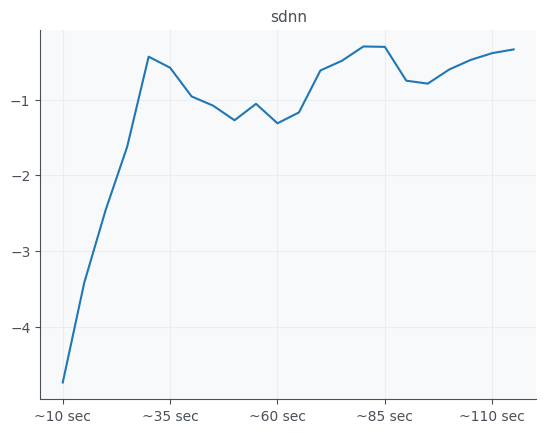

In [30]:
sdnn_diff.mean().plot(title = 'sdnn')

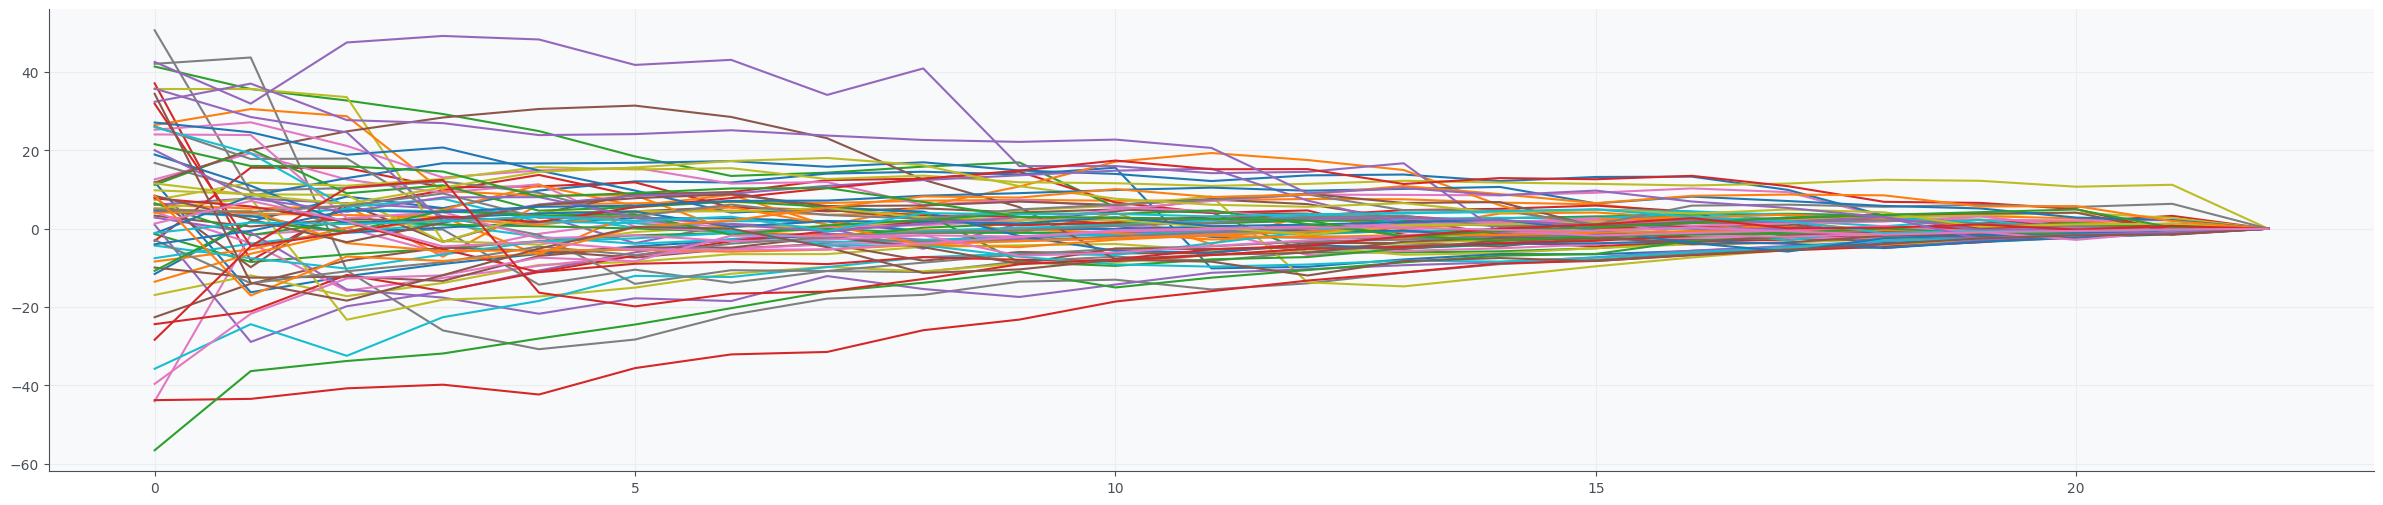

In [5]:
plt.figure(figsize = (30, 6))
for row in sdnn_result.iterrows():
    if not abs(row[1][-1] - row[1].to_numpy()).max() > 100:
        plt.plot(row[1][-1] - row[1].to_numpy(), label = row[0])

<Axes: title={'center': 'rmssd'}>

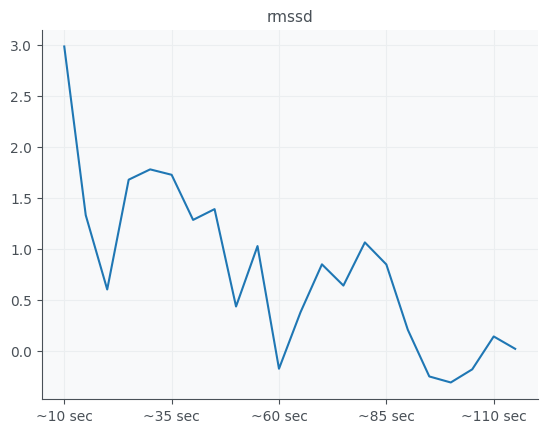

In [31]:
rmssd_diff = rmssd_result.apply(get_diff, axis = 1)
rmssd_diff.mean().plot(title = 'rmssd')

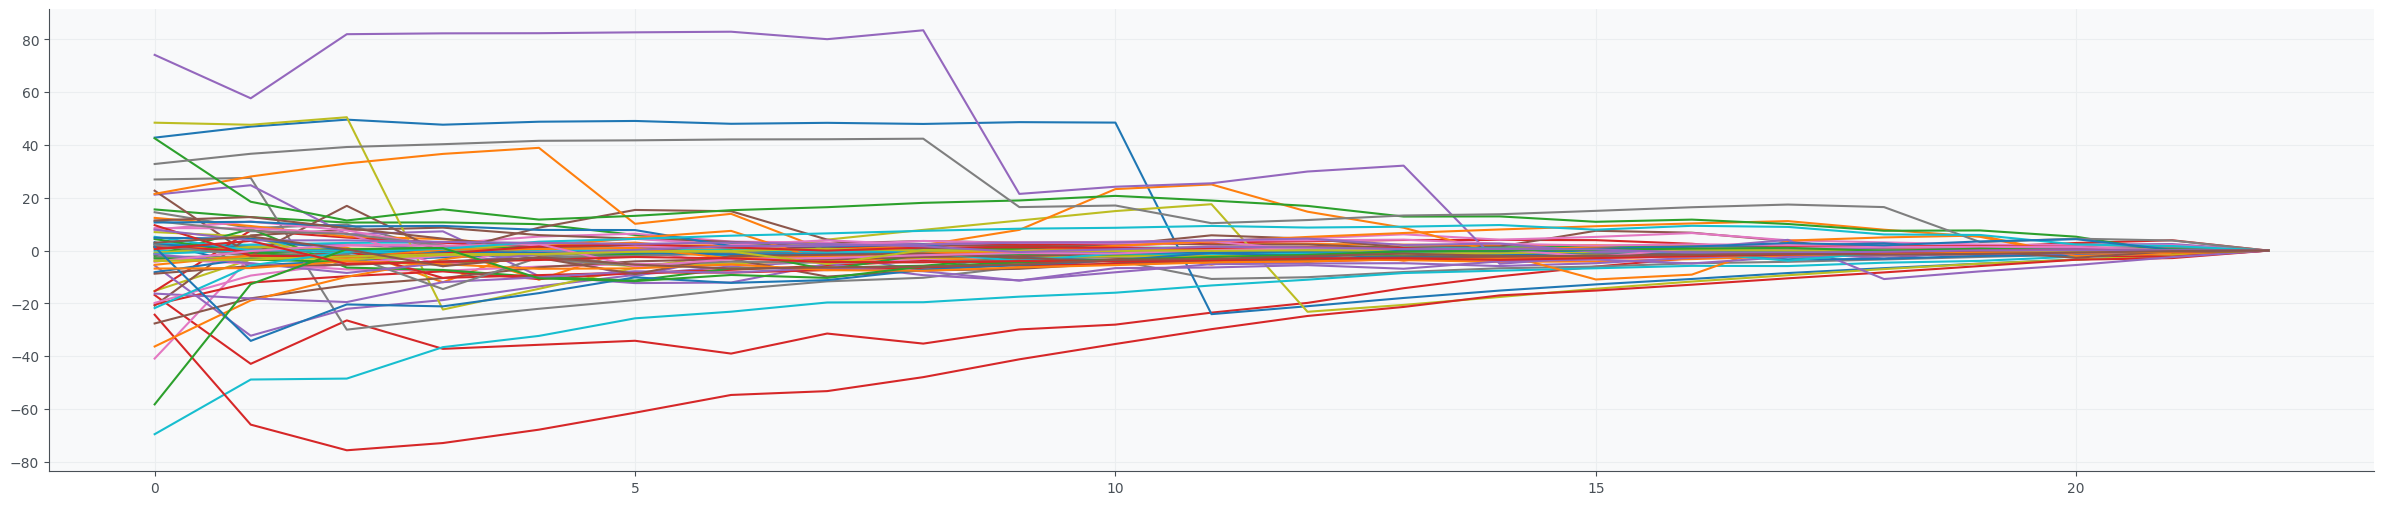

In [6]:
plt.figure(figsize = (30, 6))
for row in rmssd_result.iterrows():
    if not abs(row[1][-1] - row[1].to_numpy()).max() > 100:
        plt.plot(row[1][-1] - row[1].to_numpy(), label = row[0])